In [1]:
# !pip install pandas
# !pip install matplotlib
# !pip install googletrans==4.0.0rc1
# !pip install tqdm
# !pip install wordcloud
# !pip install 'fugashi[unidic]'
# !python -m unidic download

# Load Data

In [2]:
import pandas as pd
import fugashi
from collections import defaultdict
import matplotlib.pyplot as plt
from googletrans import Translator
from tqdm import tqdm
from wordcloud import WordCloud

In [3]:
FIRST_TEXT = 0
LAST_TEXT = 39

df = pd.read_csv('sport.csv')[FIRST_TEXT:LAST_TEXT]

Let's look at our titles

In [4]:
# look at titles
print(*df["Title"].values, sep="\n\n")

腕支持運動

クッションやバランスボール

エバーマット

ジグザクマット

あざらし

着地

跳び、駆け抜け

開脚用の跳び箱

ネットボール

車いすバスケットボール

ツインバスケットボール

Sitting-Shooter Basketball

ソーシャルフットボール知的障がい者サッカー

アンプティサッカーCP サッカー

電動車椅子サッカー

デフサッカーデフフットサル

ブラインドサッカーロービジョンフットサル

ウォーキングフットボール

大玉(バランスボール)サッカー箱(サイコロ)サッカー

棒サッカーハンドサッカー

シッティングバレーボール

ヘルスバレーボール

風船バレーボール

フロアバレーボール

車いすテニス

ブラインドテニス

バウンドテニス

ショートテニス

ラージボール

サウンドテーブルテニス

卓球バレー

クロスミトンデカ(ジャンボ)バドミントン

フットベースボール

ティーボール

ハンドベースボール

ボッチャ(T スロー)

フライングディスク

キンボール

フロアホッケー


And on our texts.

In [5]:
#look at texts
print(*df['Text'].values, sep='\n\n')

よつばいやキャスター、手押し車等で体重を支えながら動く運動！ (アダプテッドの視点) マット運動に必要な要素である腕支持に楽しく取り組めるよう、キャスターやトンネル等を設定し、楽しめる工夫をする。児童生徒同士で手押し車等をしてコミュニケーションを深めてもよい活動となる。

クッションで身体を伸ばしたり、バランスボールで弾んだり！ (アダプテッドの視点) マット運動は回転系のイメージが強いが、体重を支持したり、自分の身を教師に任せたりすることが難しい児童生徒は多い。クッションやバランスボールを使って身体を伸ばす、座る、乗っかる、バランスをとる等の動きを楽しんで取り組めるように工夫する。

エバーマットを使って、転がったり、飛び降りたり、回ったり！ (アダプテッドの視点) マットに苦手意識があったり、マットに恐怖心があったりする児童生徒に対して、やわらかい素材のエバーマットを活用することで多様な動きを引き出すことができる。最初は自由な動きから始め、安心安全に取り組めることが分かったら、這う動きや寝返り、少し高い所からの着地、更に慣れてきたら前転などに取り組むことができる。コースを設定することでいくつかの動きを組み合わせることもできる。

変形マットで、見通しがもてる。連続前転、方向転換！ (アダプテッドの視点) 前転ができる児童生徒は、連続して技に取り組めるように環境を設定する。ただ前転の練習を繰り返すだけでなく、見通しをもって、自分から連続で取り組んだり、方向転換をしたりできる環境を考えることが大切である。マットに手形を置いたり、まっすぐ回れるようにコースを作ったり等、工夫することができる。

道具を使わずに、床で体重を支えながら動く運動！ (アダプテッドの視点) 跳び箱運動に必要な要素である腕支持に楽しく取り組めるよう、馴染みのある動物などの模倣動作をし、楽しめる工夫をする。児童生徒同士で一緒に行うことで、コミュニケーションを深められてよい活動となる。

跳び箱に親しみ、着地の感覚を身に付ける！ (アダプテッドの視点) 跳び箱運動は開脚跳び等の切り返し系のイメージが強いが、着手や体重移動が習得できず、跳び越すことが難しい児童生徒は多い。跳び乗りや着地をメインの活動とし、楽しんで取り組めるように工夫することも大切である。

ゲーム感覚で体重移動、跳び箱で多様な活動！ 

# Time to process

Today we will use nagisa

Nagisa is a python module for Japanese word segmentation/POS-tagging. It is designed to be a simple and easy-to-use tool.

In [6]:
tagger = fugashi.Tagger()
for word in tagger("半ばにして亡くなった友達の死亡を悼んだ"):
    print(word.surface)

半ば
に
し
て
亡くなっ
た
友達
の
死亡
を
悼ん
だ


Now let's try it on out data.

In [15]:
DROP_POS = ["記号", "助詞", "助動詞", "補助記号"]

STOP_WORDS = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '0', 'する', 'し', 'さ', 'き', 'よう', 'こと', 'テッド', 'ある', 'あった', 'いる', 'つ', 'HP', 'cm', 'mm', '人']  # add stop words 

In [16]:
tagger = fugashi.Tagger()

text_counts = defaultdict(int)

for text in df["Text"]:
    for word in tagger(text):
        if word.feature.pos1 in DROP_POS or word.surface in STOP_WORDS:
            continue
        text_counts[word.surface] += 1

counts_df = (
    pd.Series(text_counts)
    .sort_values(ascending=False)
    .rename_axis("token_ja")
    .reset_index(name="count")
)

counts_df.head(50)

,token_ja,count
0,ボール,63
1,アダプ,48
2,視点,46
3,できる,33
4,スポーツ,30
5,日本,28
6,コート,27
7,サッカー,26
8,詳しく,25
9,学ぶ,25


# Google Translate

Let's translate our words into russian using google translate.

In [17]:
translator = Translator()
def translate_text(text):
    result = translator.translate(text, src="ja", dest="ru")
    return result.text

ru_tokens = []

for token in tqdm(counts_df['token_ja']):
    try:
        ru_tokens.append(translate_text(token))
    except:
        ru_tokens.append('')

counts_df['token_ru'] = ru_tokens
counts_df = counts_df[['token_ja', 'token_ru', 'count']]

100%|██████████| 1084/1084 [19:16<00:00,  1.07s/it]


In [18]:
counts_df.head(50)

,token_ja,token_ru,count
0,ボール,мяч,63
1,アダプ,адаптер,48
2,視点,перспектива,46
3,できる,может,33
4,スポーツ,спорт,30
5,日本,Япония,28
6,コート,пальто,27
7,サッカー,футбольный,26
8,詳しく,подробно,25
9,学ぶ,учиться,25


# Japanese WordCloud

Time to draw a cool cloud.

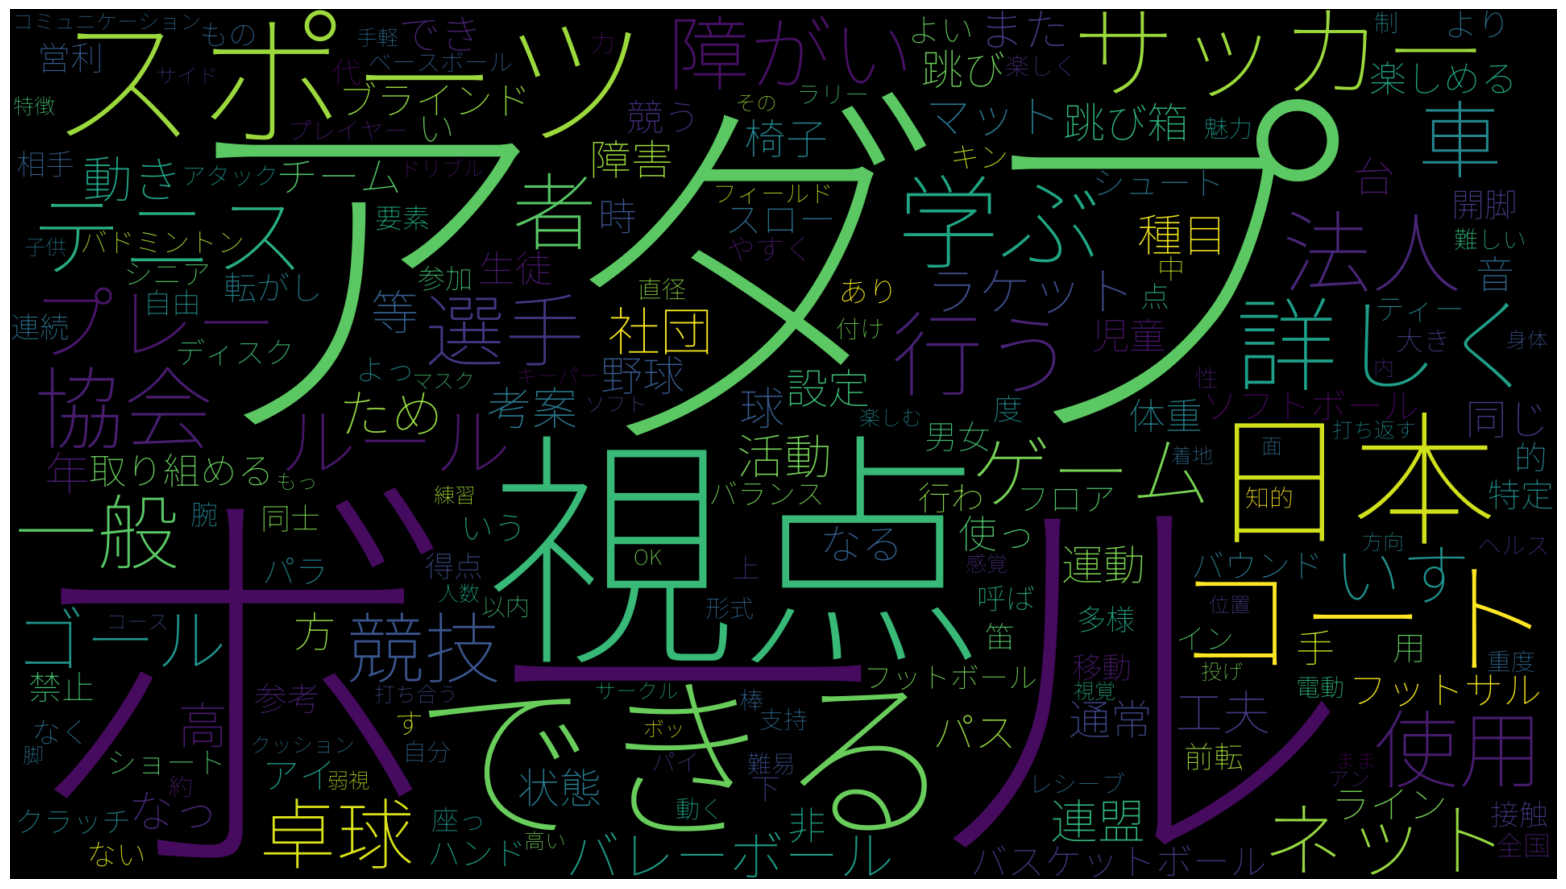

In [19]:
font_path = "font.ttf"
text_counts = {k: v for k,v in zip(counts_df['token_ja'], counts_df['count'])}

wc = WordCloud(
    font_path=font_path,
    width=1920,
    height=1080,
    background_color="black",
    collocations=True,
    prefer_horizontal=1,  
    min_font_size=8,
).generate_from_frequencies(text_counts)

plt.figure(figsize=(16, 9))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.tight_layout()
plt.show()

# Russian Wordcloud

Russian is even cooler.

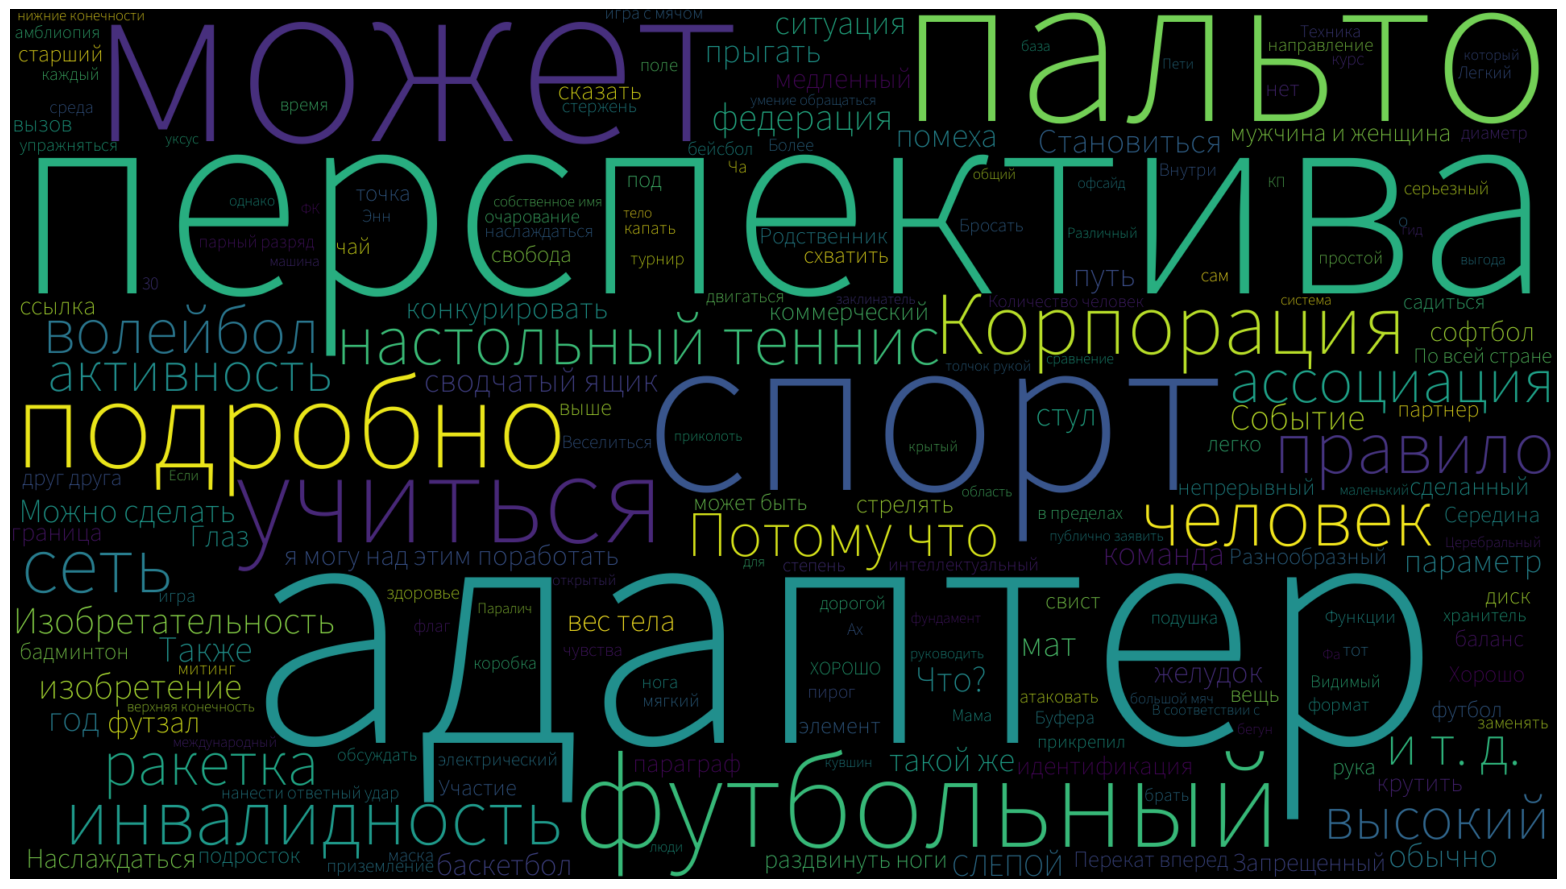

In [20]:
font_path = "font.ttf"
text_counts = {k: v for k, v in zip(counts_df["token_ru"], counts_df["count"])}

wc = WordCloud(
    font_path=font_path,
    width=1920,
    height=1080,
    background_color="black",
    collocations=True,
    prefer_horizontal=1,
    min_font_size=8,
).generate_from_frequencies(text_counts)

plt.figure(figsize=(16, 9))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.tight_layout()
plt.show()